***SALES DATA ANALYSIS***

Total Sales: 2261536.7827000003

Yearly Sales:
   Year        Sales
0  2015  479856.2081
1  2016  459436.0054
2  2017  600192.5500
3  2018  722052.0192

Monthly Sales (Across All Years):
    Month        Sales
0       1   94291.6296
1       2   59371.1154
2       3  197573.5872
3       4  136283.0006
4       5  154086.7237
5       6  145837.5233
6       7  145535.6890
7       8  157315.9270
8       9  300103.4117
9      10  199496.2947
10     11  350161.7110
11     12  321480.1695


<ipython-input-11-e344d8a53be6>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Sales', data=yearly_sales, palette='viridis')


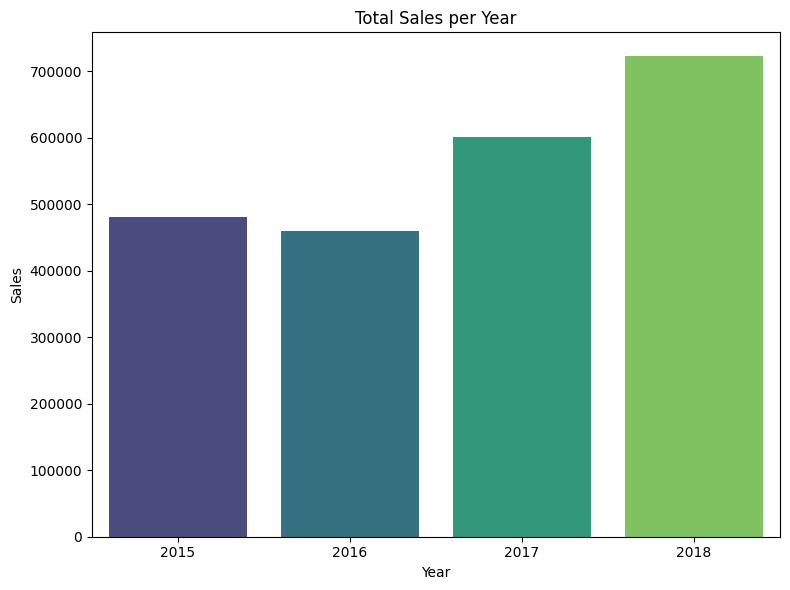

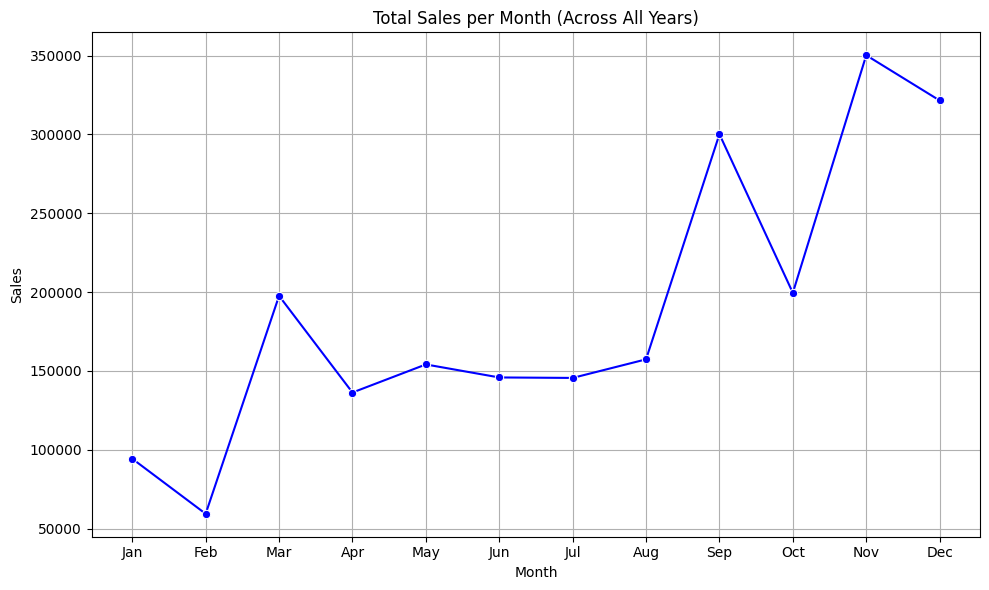

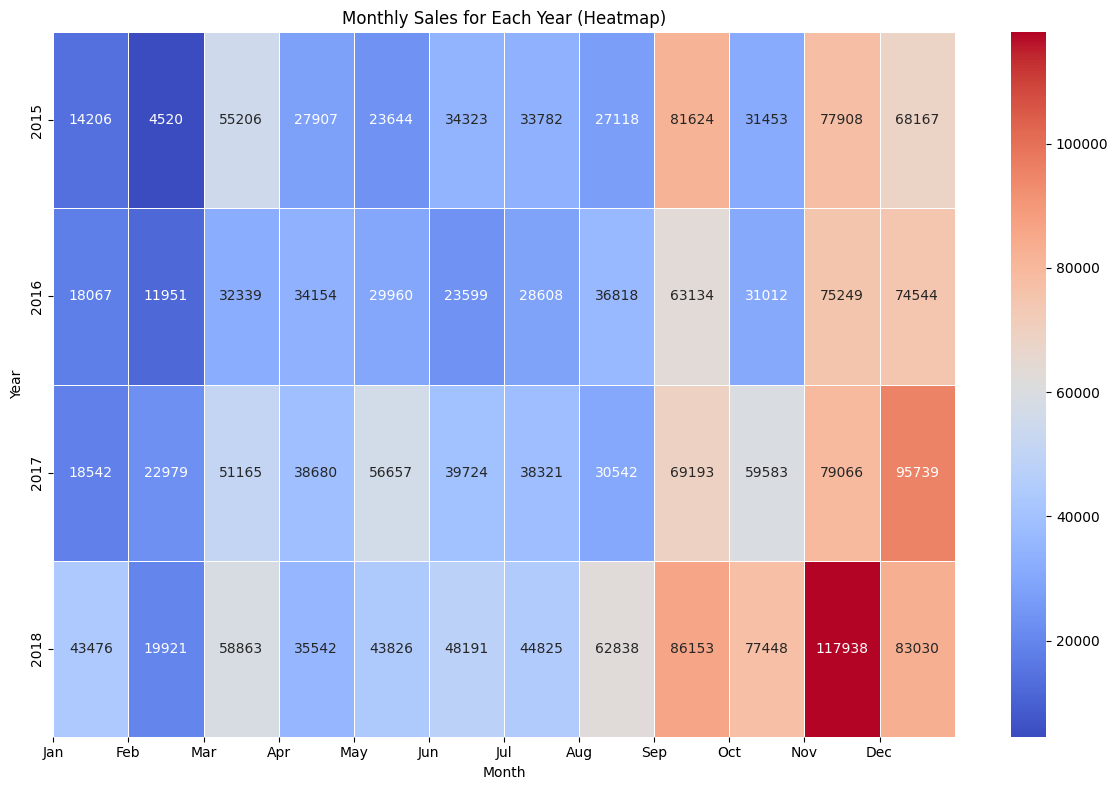


Year-over-Year Sales Growth:
   Year        Sales  YoY Growth (%)
0  2015  479856.2081             NaN
1  2016  459436.0054       -4.255484
2  2017  600192.5500       30.636812
3  2018  722052.0192       20.303396


<ipython-input-11-e344d8a53be6>:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='YoY Growth (%)', data=yearly_sales, palette='coolwarm')


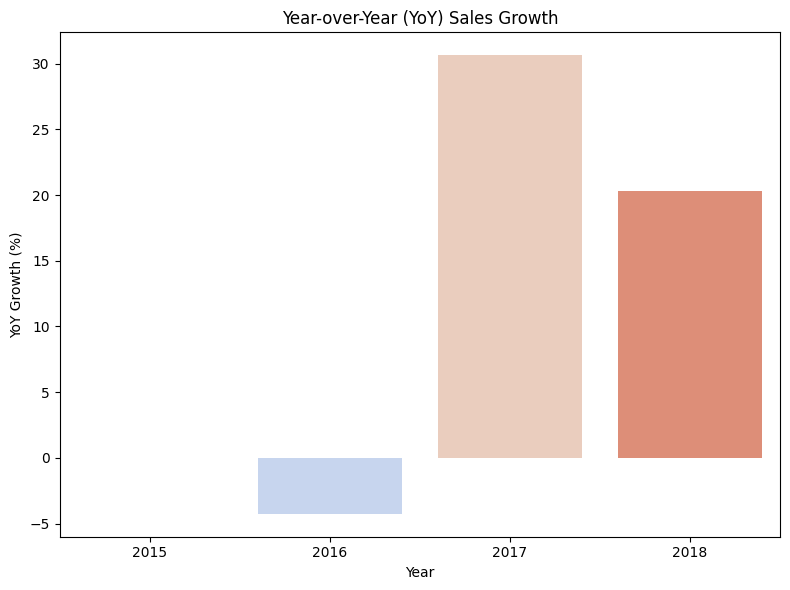


Best Month: 11.0 with Sales of 350161.711
Worst Month: 2.0 with Sales of 59371.1154


<ipython-input-11-e344d8a53be6>:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Sales', data=monthly_sales, palette='Set3')


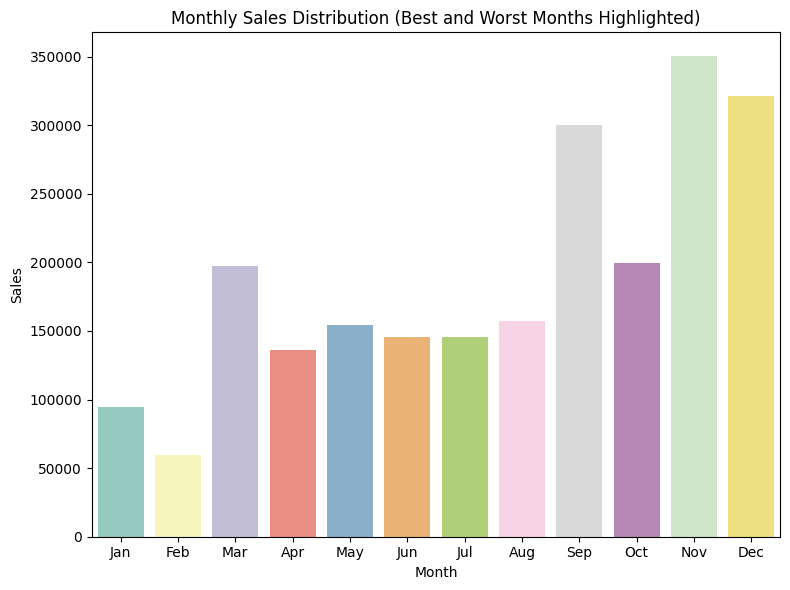


Average Sales per Quarter:
   Quarter       Sales
0   2015Q1  266.900347
1   2015Q2  224.801292
2   2015Q3  256.797489
3   2015Q4  240.227486
4   2016Q1  250.432478
5   2016Q2  203.511306
6   2016Q3  222.038354
7   2016Q4  227.141631
8   2017Q1  278.337432
9   2017Q2  230.873779
10  2017Q3  191.744964
11  2017Q4  261.594475
12  2018Q1  252.605133
13  2018Q2  188.975733
14  2018Q3  217.770607
15  2018Q4  230.286745


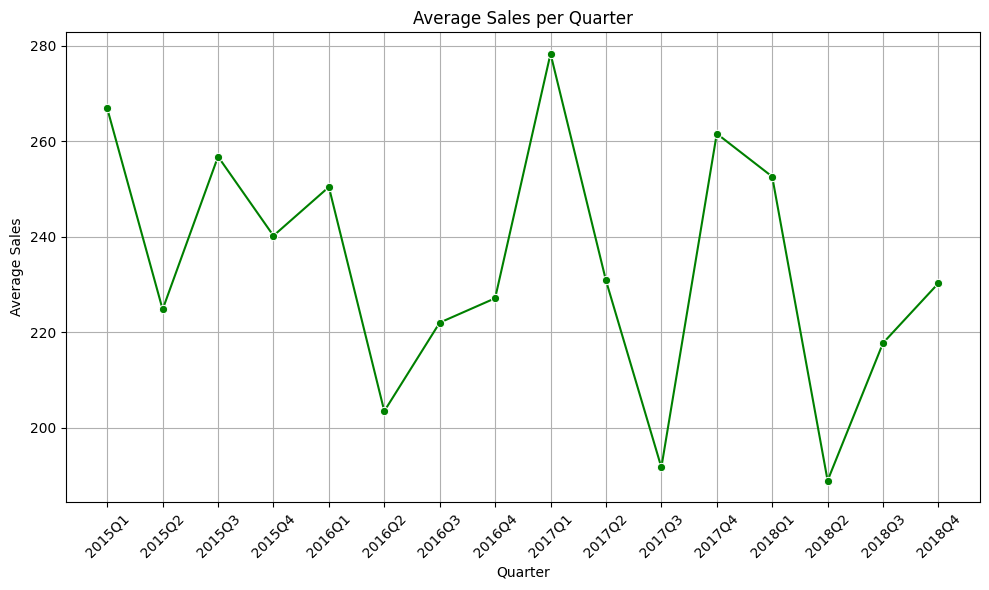

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (update the file path as needed)
data = pd.read_csv('/content/train[1].csv')

# Step 1: Convert 'Order Date' to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'], dayfirst=True)

# Step 2: Extract 'Year' and 'Month' from 'Order Date'
data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month

# Step 3: Perform basic analysis (total sales, sales per year, etc.)

# 3.1 Total Sales Across All Years
total_sales = data['Sales'].sum()
print(f"Total Sales: {total_sales}")

# 3.2 Total Sales per Year
yearly_sales = data.groupby('Year')['Sales'].sum().reset_index()
print("\nYearly Sales:")
print(yearly_sales)

# 3.3 Total Sales per Month (across all years)
monthly_sales = data.groupby('Month')['Sales'].sum().reset_index()
print("\nMonthly Sales (Across All Years):")
print(monthly_sales)

# Step 4: Visualize the results

# 4.1 Yearly Sales - Bar Chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Year', y='Sales', data=yearly_sales, palette='viridis')
plt.title('Total Sales per Year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

# 4.2 Monthly Sales (Across All Years) - Line Chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Sales', data=monthly_sales, marker='o', color='b')
plt.title('Total Sales per Month (Across All Years)')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.tight_layout()
plt.show()

# 4.3 Sales Trend - Monthly Sales for Each Year (Heatmap)
monthly_sales_by_year = data.groupby(['Year', 'Month'])['Sales'].sum().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_sales_by_year, annot=True, fmt='.0f', cmap='coolwarm', linewidths=0.5)
plt.title('Monthly Sales for Each Year (Heatmap)')
plt.xlabel('Month')
plt.ylabel('Year')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

# Step 5: Calculate Year-over-Year (YoY) Growth

# 5.1 Year-over-Year Sales Growth
yearly_sales['YoY Growth (%)'] = yearly_sales['Sales'].pct_change() * 100
print("\nYear-over-Year Sales Growth:")
print(yearly_sales)

# 5.2 Visualize YoY Growth
plt.figure(figsize=(8, 6))
sns.barplot(x='Year', y='YoY Growth (%)', data=yearly_sales, palette='coolwarm')
plt.title('Year-over-Year (YoY) Sales Growth')
plt.xlabel('Year')
plt.ylabel('YoY Growth (%)')
plt.tight_layout()
plt.show()

# Step 6: Identify the Best and Worst Performing Months Across All Years

# 6.1 Best and Worst Months
best_month = monthly_sales.loc[monthly_sales['Sales'].idxmax()]
worst_month = monthly_sales.loc[monthly_sales['Sales'].idxmin()]

print(f"\nBest Month: {best_month['Month']} with Sales of {best_month['Sales']}")
print(f"Worst Month: {worst_month['Month']} with Sales of {worst_month['Sales']}")

# 6.2 Visualize the Best and Worst Months (Bar Plot)
plt.figure(figsize=(8, 6))
sns.barplot(x='Month', y='Sales', data=monthly_sales, palette='Set3')
plt.title('Monthly Sales Distribution (Best and Worst Months Highlighted)')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

# Step 7: Additional Insights (Quarterly Sales Analysis)

# 7.1 Seasonal Analysis - Average Sales per Quarter
data['Quarter'] = data['Order Date'].dt.to_period('Q')
quarterly_sales = data.groupby('Quarter')['Sales'].mean().reset_index()

print("\nAverage Sales per Quarter:")
print(quarterly_sales)

# Ensure 'Sales' is numeric (in case there are any non-numeric values)
quarterly_sales['Sales'] = pd.to_numeric(quarterly_sales['Sales'], errors='coerce')

# Convert 'Quarter' to a string for proper plotting
quarterly_sales['Quarter'] = quarterly_sales['Quarter'].astype(str)

# Visualize Quarterly Sales
plt.figure(figsize=(10, 6))
sns.lineplot(x='Quarter', y='Sales', data=quarterly_sales, marker='o', color='g')
plt.title('Average Sales per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


***DESCRIPTIVE SALES ANALYSIS***

In [ ]:


# Step 1: Convert 'Order Date' to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'], dayfirst=True)

# Step 2: Extract 'Year' and 'Month' from 'Order Date'
data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month

# Step 3: Perform Descriptive Analysis

# 3.1 Basic Descriptive Statistics for Sales
sales_stats = data['Sales'].describe()
print("Basic Descriptive Statistics for Sales:")
print(sales_stats)

# 3.2 Total Sales Across All Years
total_sales = data['Sales'].sum()
print(f"\nTotal Sales Across All Years: {total_sales}")

# 3.3 Average Sales Across All Years
average_sales = data['Sales'].mean()
print(f"Average Sales Across All Years: {average_sales}")

# 3.4 Sales Variance and Standard Deviation
sales_variance = data['Sales'].var()
sales_std_dev = data['Sales'].std()
print(f"Sales Variance: {sales_variance}")
print(f"Sales Standard Deviation: {sales_std_dev}")

# 3.5 Yearly Sales Breakdown
yearly_sales = data.groupby('Year')['Sales'].sum().reset_index()
print("\nYearly Sales Breakdown:")
print(yearly_sales)

# 3.6 Monthly Sales Breakdown (across all years)
monthly_sales = data.groupby('Month')['Sales'].sum().reset_index()
print("\nMonthly Sales Breakdown (Across All Years):")
print(monthly_sales)

# 3.7 Median Sales (Across All Years)
median_sales = data['Sales'].median()
print(f"\nMedian Sales Across All Years: {median_sales}")

# 3.8 Sales Range (Min and Max)
min_sales = data['Sales'].min()
max_sales = data['Sales'].max()
print(f"\nMinimum Sales: {min_sales}")
print(f"Maximum Sales: {max_sales}")

# 3.9 Sales Percentiles
sales_25th_percentile = data['Sales'].quantile(0.25)
sales_50th_percentile = data['Sales'].quantile(0.50)
sales_75th_percentile = data['Sales'].quantile(0.75)
print(f"\n25th Percentile Sales: {sales_25th_percentile}")
print(f"50th Percentile (Median) Sales: {sales_50th_percentile}")
print(f"75th Percentile Sales: {sales_75th_percentile}")

# 3.10 Year-over-Year Sales Growth
yearly_sales['YoY Growth (%)'] = yearly_sales['Sales'].pct_change() * 100
print("\nYear-over-Year Sales Growth (%):")
print(yearly_sales[['Year', 'Sales', 'YoY Growth (%)']])

# 3.11 Identify the Best and Worst Performing Years
best_year = yearly_sales.loc[yearly_sales['Sales'].idxmax()]
worst_year = yearly_sales.loc[yearly_sales['Sales'].idxmin()]
print(f"\nBest Year: {best_year['Year']} with Sales of {best_year['Sales']}")
print(f"Worst Year: {worst_year['Year']} with Sales of {worst_year['Sales']}")

# 3.12 Monthly Sales Performance Overview
monthly_sales_stats = data.groupby('Month')['Sales'].describe()
print("\nMonthly Sales Performance (Descriptive Stats):")
print(monthly_sales_stats)


Basic Descriptive Statistics for Sales:
count     9800.000000
mean       230.769059
std        626.651875
min          0.444000
25%         17.248000
50%         54.490000
75%        210.605000
max      22638.480000
Name: Sales, dtype: float64

Total Sales Across All Years: 2261536.7827000003
Average Sales Across All Years: 230.7690594591837
Sales Variance: 392692.5722389884
Sales Standard Deviation: 626.6518748388042

Yearly Sales Breakdown:
   Year        Sales
0  2015  479856.2081
1  2016  459436.0054
2  2017  600192.5500
3  2018  722052.0192

Monthly Sales Breakdown (Across All Years):
    Month        Sales
0       1   94291.6296
1       2   59371.1154
2       3  197573.5872
3       4  136283.0006
4       5  154086.7237
5       6  145837.5233
6       7  145535.6890
7       8  157315.9270
8       9  300103.4117
9      10  199496.2947
10     11  350161.7110
11     12  321480.1695

Median Sales Across All Years: 54.489999999999995

Minimum Sales: 0.444
Maximum Sales: 22638.48

25th P

**CUSTOMER SEGMENTATION **

In [ ]:
import datetime as dt

# Load the dataset (update the file path as needed)
data = pd.read_csv('/content/train[1].csv')

# Step 1: Convert 'Order Date' to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'], dayfirst=True)

# Step 2: Define a reference date for calculating 'Recency' (use the latest date in your dataset or a reference point)
reference_date = data['Order Date'].max() + dt.timedelta(days=1)

# Step 3: Calculate RFM (Recency, Frequency, Monetary)

# 3.1 Recency: Number of days since the customer's last purchase
rfm = data.groupby('Customer ID').agg({
    'Order Date': lambda x: (reference_date - x.max()).days,
    'Order ID': 'count',
    'Sales': 'sum'
}).reset_index()

# Rename the columns for better understanding
rfm.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']

# Step 4: Rank Customers by RFM Scores
# Assign scores from 1 to 5 based on quantiles (higher score means better)

rfm['RecencyScore'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['FrequencyScore'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm['MonetaryScore'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# Step 5: Combine Recency, Frequency, and Monetary scores to get an RFM Score
rfm['RFM_Score'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str) + rfm['MonetaryScore'].astype(str)

# Step 6: Segment customers based on RFM score
# You can create meaningful segments based on common RFM patterns, for example:

def rfm_segment(rfm):
    if rfm['RFM_Score'] == '555':
        return 'Top Customers'
    elif rfm['RFM_Score'].startswith('5'):
        return 'Loyal Customers'
    elif rfm['RFM_Score'].startswith('1'):
        return 'Churned Customers'
    elif rfm['RFM_Score'].startswith('3') or rfm['RFM_Score'].startswith('4'):
        return 'Potential Loyalists'
    else:
        return 'Other'

rfm['Segment'] = rfm.apply(rfm_segment, axis=1)

# Step 7: Summary of Segments
segment_summary = rfm.groupby('Segment').agg({
    'Customer ID': 'count',
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'sum']
}).reset_index()

# Rename multi-level columns
segment_summary.columns = ['Segment', 'Customer Count', 'Avg Recency', 'Avg Frequency', 'Avg Monetary', 'Total Monetary']

print("\nCustomer Segmentation Summary:")
print(segment_summary)





Customer Segmentation Summary:
               Segment  Customer Count  Avg Recency  Avg Frequency  \
0    Churned Customers             159   462.962264       9.106918   
1      Loyal Customers             139    14.021583      12.597122   
2                Other             157   153.528662      12.152866   
3  Potential Loyalists             316    58.256329      13.250000   
4        Top Customers              22    14.136364      23.000000   

   Avg Monetary  Total Monetary  
0   2138.705965    3.400542e+05  
1   2457.859697    3.416425e+05  
2   2693.097918    4.228164e+05  
3   3219.504527    1.017363e+06  
4   6348.192400    1.396602e+05  


Average Shipping Time: 3.96 days
Maximum Shipping Time: 7 days
Minimum Shipping Time: 0 days
On-time Shipping Rate (within 3 days): 32.14%
Number of Late Shipments: 3336
Percentage of Late Shipments: 67.78%

Average Shipping Time per Year:
   Year  Shipping Time (Days)
0  2015              3.995904
1  2016              4.036010
2  2017              3.945541
3  2018              3.905157


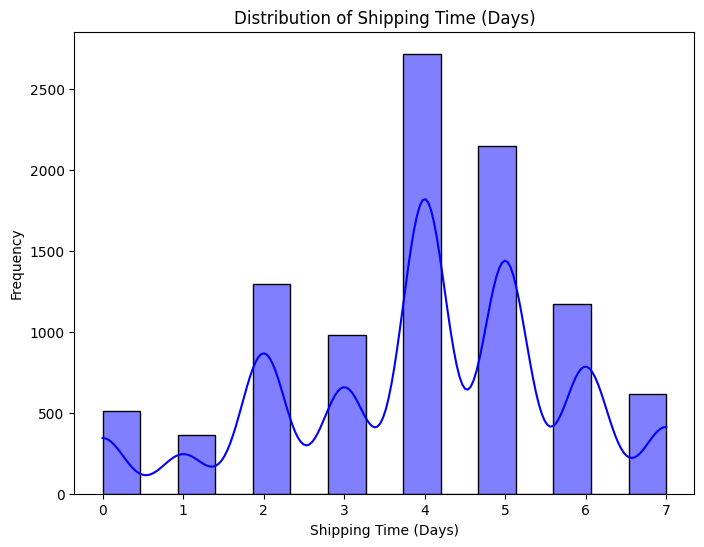

<ipython-input-14-e11de886d8e0>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Count', data=on_time_vs_late, palette='Blues_d')


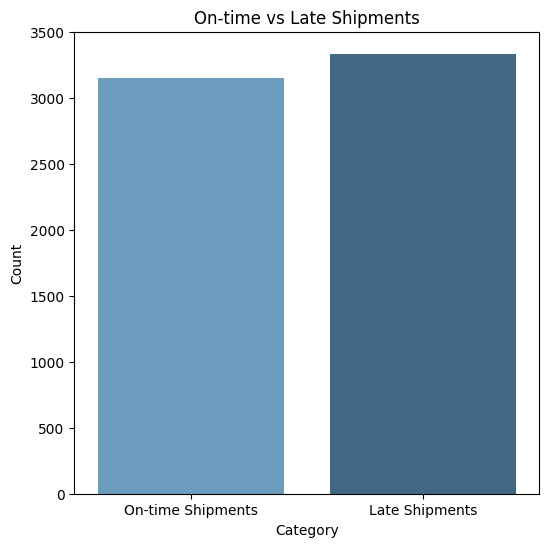

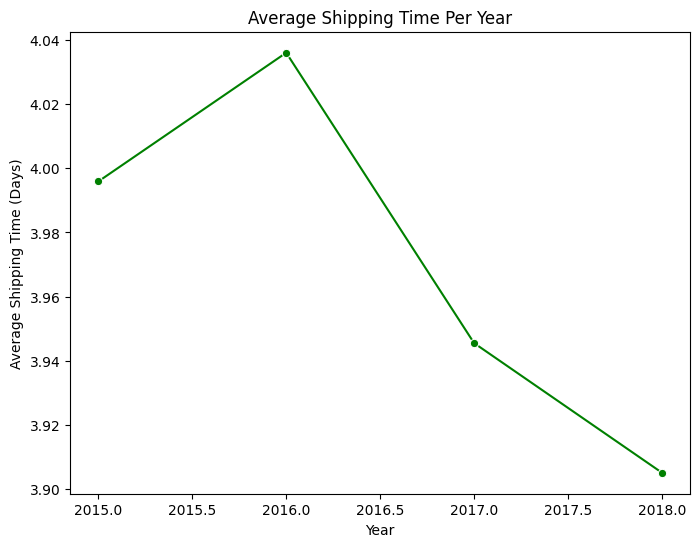

In [ ]:

# Step 1: Convert 'Ship Date' to datetime format
data['Ship Date'] = pd.to_datetime(data['Ship Date'], dayfirst=True)

# Step 2: Calculate Shipping Time (Difference between Order Date and Ship Date)
data['Shipping Time (Days)'] = (data['Ship Date'] - data['Order Date']).dt.days

# Step 3: Shipping Efficiency Metrics

# 3.1 Average Shipping Time
average_shipping_time = data['Shipping Time (Days)'].mean()
print(f"Average Shipping Time: {average_shipping_time:.2f} days")

# 3.2 Maximum and Minimum Shipping Time
max_shipping_time = data['Shipping Time (Days)'].max()
min_shipping_time = data['Shipping Time (Days)'].min()
print(f"Maximum Shipping Time: {max_shipping_time} days")
print(f"Minimum Shipping Time: {min_shipping_time} days")

# 3.3 On-time Shipping Rate (within a target of 3 days)
on_time_shipping_rate = (data['Shipping Time (Days)'] <= 3).mean() * 100
print(f"On-time Shipping Rate (within 3 days): {on_time_shipping_rate:.2f}%")

# 3.4 Late Shipments (More than 3 days)
late_shipments = data[data['Shipping Time (Days)'] > 3]
late_shipments_count = late_shipments['Order ID'].nunique()
print(f"Number of Late Shipments: {late_shipments_count}")

# 3.5 Late Shipment Percentage
late_shipment_percentage = (late_shipments_count / data['Order ID'].nunique()) * 100
print(f"Percentage of Late Shipments: {late_shipment_percentage:.2f}%")

# Step 4: Analyze Shipping Efficiency over Time (Yearly or Monthly)

# Extract year and month from 'Order Date'
data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month

# 4.1 Average Shipping Time Per Year
yearly_shipping_time = data.groupby('Year')['Shipping Time (Days)'].mean().reset_index()
print("\nAverage Shipping Time per Year:")
print(yearly_shipping_time)

# Step 5: Visualize Shipping Efficiency with Graphs

# 5.1 Distribution of Shipping Time
plt.figure(figsize=(8, 6))
sns.histplot(data['Shipping Time (Days)'], bins=15, kde=True, color='blue')
plt.title('Distribution of Shipping Time (Days)')
plt.xlabel('Shipping Time (Days)')
plt.ylabel('Frequency')
plt.show()

# 5.2 On-time vs Late Shipments
on_time_vs_late = pd.DataFrame({
    'Category': ['On-time Shipments', 'Late Shipments'],
    'Count': [len(data[data['Shipping Time (Days)'] <= 3]), late_shipments_count]
})

plt.figure(figsize=(6, 6))
sns.barplot(x='Category', y='Count', data=on_time_vs_late, palette='Blues_d')
plt.title('On-time vs Late Shipments')
plt.show()

# 5.3 Average Shipping Time per Year
plt.figure(figsize=(8, 6))
sns.lineplot(x='Year', y='Shipping Time (Days)', data=yearly_shipping_time, marker='o', color='green')
plt.title('Average Shipping Time Per Year')
plt.xlabel('Year')
plt.ylabel('Average Shipping Time (Days)')
plt.show()



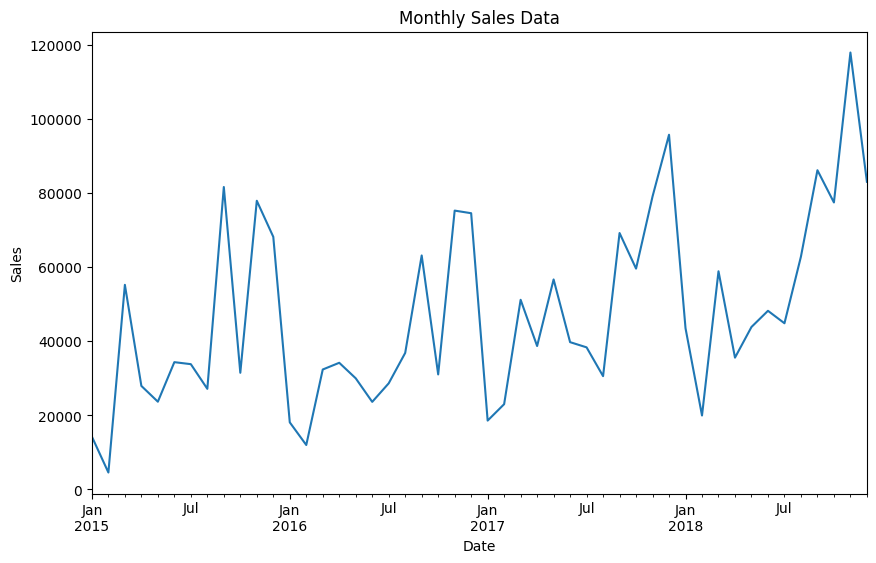

ADF Statistic: -4.416136761430769
p-value: 0.00027791039276670623
The data is stationary.


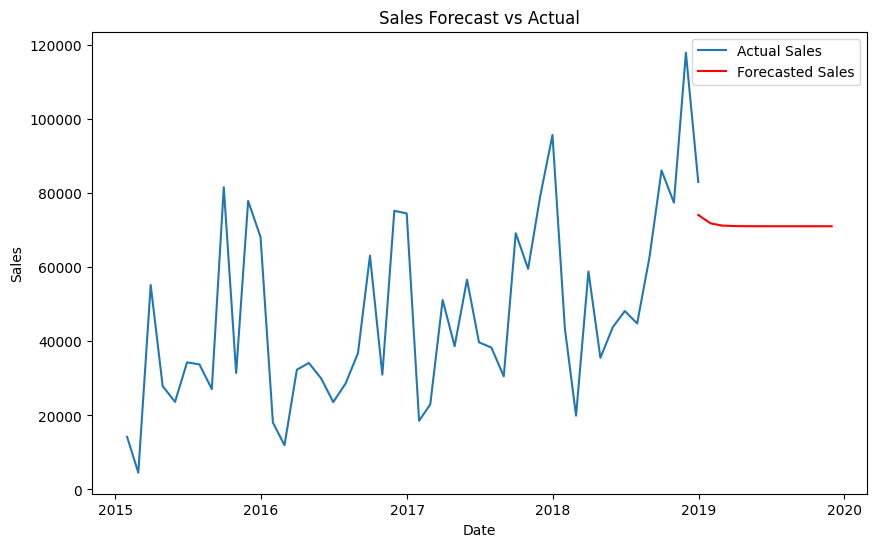

RMSE: 26996.79282167387


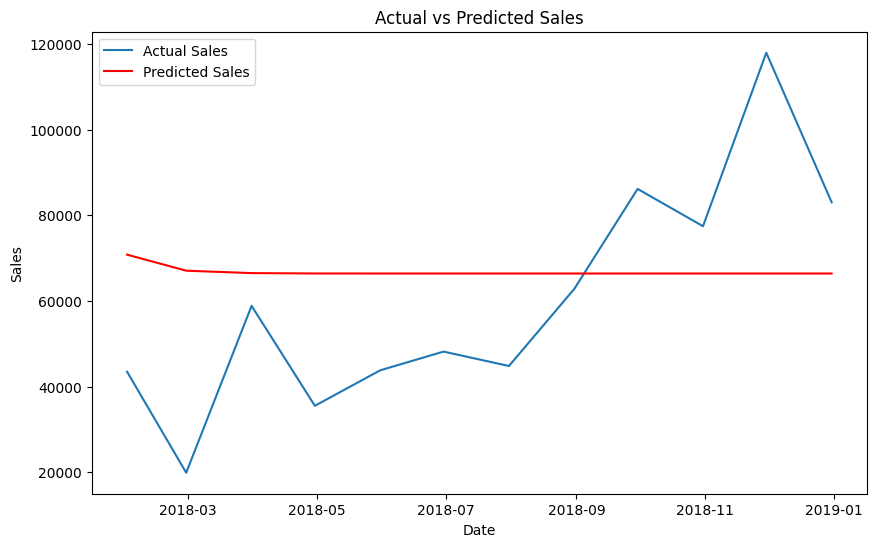

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error


# Convert 'Order Date' to datetime and sort the data by date
data['Order Date'] = pd.to_datetime(data['Order Date'], dayfirst=True)
data = data.sort_values('Order Date')

# Step 2: Aggregate sales data by month
# Ensure that we exclude datetime columns during aggregation
# Resample by month and sum numerical columns like 'Sales'
monthly_sales = data.resample('M', on='Order Date').sum(numeric_only=True)['Sales']

# Step 3: Visualize the Time Series Data
plt.figure(figsize=(10, 6))
monthly_sales.plot()
plt.title('Monthly Sales Data')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.show()

# Step 4: Check for Stationarity (Required for ARIMA)
def test_stationarity(timeseries):
    result = adfuller(timeseries)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print("The data is stationary.")
    else:
        print("The data is not stationary, differencing required.")

# Perform stationarity test
test_stationarity(monthly_sales)

# Step 5: Differencing (If Required)
# If the data is not stationary, apply differencing
monthly_sales_diff = monthly_sales.diff().dropna()

# Step 6: Build the ARIMA Model
# Determine the order (p,d,q) using trial and error or automated methods like AIC
model = ARIMA(monthly_sales, order=(1, 1, 1))  # p=1, d=1, q=1 are initial guesses

# Fit the model
model_fit = model.fit()

# Step 7: Forecasting
forecast_period = 12  # Number of months to forecast
forecast = model_fit.forecast(steps=forecast_period)

# Step 8: Visualize Actual vs Forecasted Sales
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales, label='Actual Sales')
plt.plot(pd.date_range(monthly_sales.index[-1], periods=forecast_period, freq='M'), forecast, label='Forecasted Sales', color='red')
plt.title('Sales Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Step 9: Evaluate the Model Performance
# Example: Using the last 12 months for testing
train_size = len(monthly_sales) - forecast_period
train, test = monthly_sales[0:train_size], monthly_sales[train_size:]

# Fit ARIMA on training data
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

# Forecast on the test set
predictions = model_fit.forecast(steps=len(test))

# Evaluate using RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(test, predictions))
print(f'RMSE: {rmse}')

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual Sales')
plt.plot(test.index, predictions, label='Predicted Sales', color='red')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()
